# Assumptions of OLS Regression

* **Linear Relationship:** We assume $ Y = \beta_0 + \beta_1  X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon $ where $\epsilon$ is the error term and $\epsilon$ ~ $N(0, \sigma^2)$

* **No Multicolinearity:** We assume all independent (predictor) variables ($X_1, X_2, ..., X_n$) are **linearly independent** from each other. If the independent variables are highly correlated and there is a multicolinearity issue, then we can use **Principal Component Analysis** or **Factor Analysis** to solve this issue.

* **Independent error ($e$) terms:** We assume error terms for each observation point $(Y_i = \beta_0 + \beta_1  X_{i1} + ... + \beta_n X_{in} + e_i)$ are independent from each other. Meaning $e_1, e_2, ..., e_n$ are independent from each other.

* **Error terms ($e$) are normally distributed and have a mean of 0:** We assume $e_1, e_2, ..., e_n$ are all normally distributed where $e_i$ ~ $N(0, \sigma^2)$ and thus $E[e_i] = 0$

* **Error terms ($e$) have the same variance (Homoscedasticity):** When the variances of error terms are constant, we call the error terms **homoscedastic.** If the error terms are not constant, we call them **heteroskedastic.** We assume error terms are **homoscedastic** because we model them as $e_i$ ~ $N(0, \sigma^2)$

**Figure 1: Homoscedasticity vs. Heteroskedasticity**: Notice in the second graph variance of **residuals** is increasing


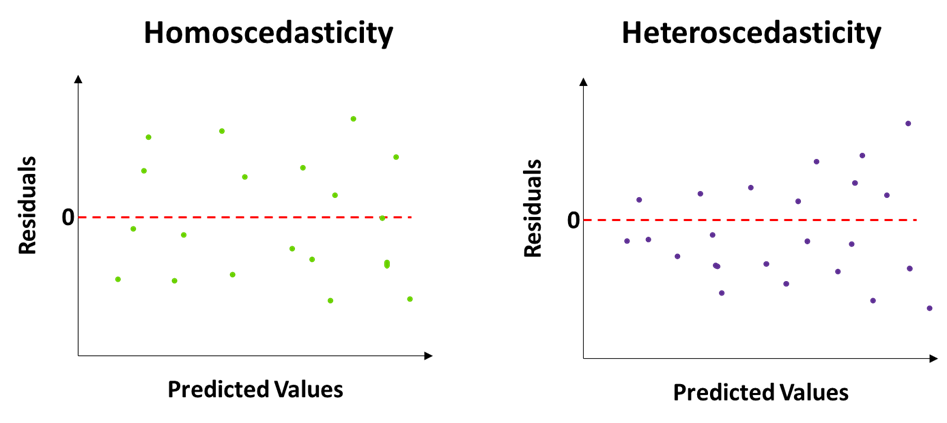



Variance matrix of **homoscedastic** error terms (constant variance):

$$ 
\mathrm{Var}(e) = \begin{pmatrix}
  \sigma ^{2} & 0 & 0 & \cdots & 0 \\ 
  0 & \sigma ^{2} & 0 & \cdots & 0 \\ 
  0 & 0 & \sigma ^{2} & \cdots & 0 \\ 
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  0 & 0 & 0 & \cdots & \sigma ^{2} \\ 
\end{pmatrix} 
$$

where,

$$var(e_1) = Var(e_2) = Var(e_n) = Var(e_i) = \sigma^2$$

Variance matrix of **heteroscedastic** error terms (changing variance):

$$ 
\mathrm{Var}(e) = \begin{pmatrix}
  \sigma_{1}^{2} & 0 & 0 & \cdots & 0 \\ 
  0 & \sigma_{2}^{2} & 0 & \cdots & 0 \\ 
  0 & 0 & \sigma_{3} ^{2} & \cdots & 0 \\ 
  \vdots & \vdots & \vdots & \ddots & \vdots \\ 
  0 & 0 & 0 & \cdots & \sigma_{n} ^{2} \\ 
\end{pmatrix} 
$$

where,

$$ Var(e_1) = \sigma_1^2 $$
$$ Var(e_2) = \sigma_2^2 $$
$$ Var(e_n) = \sigma_n^2 $$
$$ Var(e_i) = \sigma_i^2 $$

$$ Var(e_1) \neq Var(e_2) \neq Var(e_n) \neq Var(e_i) $$

The **Breusch-Pagan (BP) test** is a formal statistical test to detect the issue.The idea of the BP test is that it assumes that the variance and independent variables have a **linear** relationship. The test then runs a **regression** of the squared residuals from the original regression on the independent variables: 

$r_i^2 = (\hat{y_i} - y_i)^2 = \beta_0 + \beta_1 x_1 + ... + \beta_n x_n$

Then, a BP test checks the following hypothesis:

$$ H_{0}: \text{Homoscedasticity exists} $$

$$ H_{1}: \text{Heteroskedasticity exists} $$

This is a *Chi-square* test. If the $p$-value is less than the significant level of 0.05, we reject the null hypothesis. The residuals are not constant, so there is a heteroskedasticity issue.

## Weighted Least Squares (WLS) Regression

Let's assume the variance of the error term of observation $i$ is as follows:

$$ 
\mathrm{Var}(e_{i}) = \sigma_{i}^{2} = \frac{\sigma ^{2}}{w_{i}} 
$$

Where **weights** $w_{1}, \cdots, w_{n}$ are known positive numbers. Notice that variance of any error term $Var(e_i) = \sigma_i^2$ can be calculated as a function of $\sigma^2$

For weighted least square regression, we need to solve for coefficients by minimizing the following sum of **weighted squared residuals.**

$$ 
RSS(\beta_{0}, \beta_{1}) = \sum_{i=1}^{n} w_{i} (Y_{i} - \beta_{0} - \beta_{1}  X_{i})^{2} 
$$

We can see the <u> weight $w_{i}$ is inversely proportional to the variance of each observation </u>. It means for an observation that is highly variable (large $Var(e_i)$ value), it will be given a **smaller weight** for its weighted squared residual. Hence, this observation will have less importance in the minimization process. <u> For an observation that has small variability, its weight will be larger. Its weighted squared residual will be larger, and it will be more important in the minimization process </u>.

**Figure 2: Impact of Data Weighting on Regression Lines**


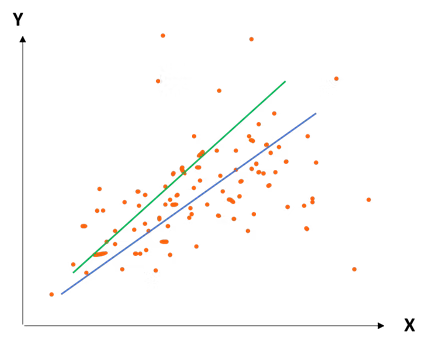



From Figure 2, $Y$ is the dependent variable and $X$ is the independent variable of a regression. Figure 2 shows the scatterplot of the two variables. From the graph, we can see the data is not homoscedastic because there is more variation of $Y$ when $X$ increases. If we do not apply weights to the data and run an OLS regression model, then the regression line will try to treat all data points equally. The result line will be like the green line. The green line is higher and steeper towards the data point on the top of the graph because OLS treats every point equally. However, if we apply weights to all the data points, we will reduce the impact of those points that are further away from where most of the points cluster together. The weighted least square (WLS) regression line will be like the blue line. WLS focuses more on the data points that are close to each other and gives lower weight to points that are farther away. Hence, WLS is also a good method to handle **outliers**. When there is an outlier in the dataset, by the method of WLS, it will give less weight so this outlier will have less impact on the result of the WLS regression model.

One thing to notice is that if the weight is $1$, then we are basically running an OLS regression model. In the field of regression analysis, OLS is actually a special case of WLS because OLS has weights equal to $1$. 

## Choosing weights $w_i$



**1. Identifying Variance:** Estimate the variance of each error term $\sigma_i^2$, possibly from a preliminary ordinary least squares (OLS) regression:

* **Preliminary OLS Regression:** Initially, you perform an Ordinary Least Squares (OLS) regression without considering the heteroscedasticity of the error terms. This is a standard regression analysis that assumes **constant variance** across all error terms:

$\qquad Y_1 = \beta_0 + \beta_1 x_i + \epsilon$  $\qquad \qquad$  $\epsilon$ ~ $N(0, \sigma^2)$

$\qquad Y_i = \beta_0 + \beta_1 x_i + \epsilon$  $\qquad \qquad$  $\epsilon$ ~ $N(0, \sigma^2)$

$\qquad \qquad .$

$\qquad \qquad .$

$\qquad$ Then find estimators $\hat{\beta_0}, \hat{\beta_1}$ and create the $\qquad \hat{y_i} = \hat{\beta_0} + \hat{\beta_1} x_i \qquad$ OLS linear regression function.

* **Analyzing Residuals:** From this OLS regression, you obtain **residuals** $r_i$ for each observation $i$. These residuals are **realized values** of the error terms:

$\qquad r_i = \hat{y_i} - y_i $

* **Estimating Variance:** This can be done in 3 ways:

$\qquad \qquad$ 1. *Graphical method:* Plot residuals against predictor variables and eye-ball the increasing or decreasing variance.

$\qquad \qquad$ 2. *Statistical tests:* Applying tests like Breusch-Pagan or White’s test to formally assess heteroscedasticity.

$\qquad \qquad$ 3. *Modeling Variance Directly (with predictor variables $X_i$):* Model $e_i$ variance as a function of predictor variables: $Var(r_i)$ is the independent variable and predictor variables are $X_i$:

$\qquad \qquad \qquad$ $Var(r_i) = \sigma_i^2 = \beta_0 + \beta_1 x_i$

$\qquad \qquad$ 4. *Modeling Variance Directly (with fitted values $\large\hat{y_i})$:* Model $e_i$ variance as a function of fitted values $\large\hat{y_i})$:

$\qquad \qquad \qquad$ $Var(r_i) = \sigma_i^2 = 1 + \gamma  \large\hat{y_i}$

**2. Inverting Variance:** The weights are typically the inverse of the estimated variances of the error terms. Thus, $\large w_i = \frac{1}{\sigma_i^2}$

**3. Normalization (Optional):** Sometimes, the weights are normalized so that <u> their sum equals the number of observations. </u> This ensures that the scale of the WLS regression is similar to that of an OLS regression.

________________________

## **3. Foreign Exchange Market Analysis Using Weighted Least Square Regression**

In [2]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

plt.rcParams["figure.figsize"] = (14, 8)  # Figure size and width

In [3]:
data_set = pd.read_csv("/home/sscf/wqu_mscfe/Financial Econometrics/M2/fin_data_set.csv")
data_set.head(10)

,Date,DXY,METALS,OIL,US_STK,INTL_STK,X13W_TB,X10Y_TBY,EURUSD,YEAR
0,1/4/2016,0.002433,0.024283,-0.007559,-0.013980,-0.019802,0.047297,-0.010577,-0.007316,2016
1,1/5/2016,0.005361,-0.004741,-0.021491,0.001691,-0.001263,0.322581,0.001336,-0.002436,2016
2,1/6/2016,-0.002213,0.013642,-0.055602,-0.012614,-0.015171,0.000000,-0.031584,-0.006978,2016
3,1/7/2016,-0.009679,0.035249,-0.020606,-0.023992,-0.019255,-0.073171,-0.011024,0.002512,2016
4,1/8/2016,0.003258,-0.028064,-0.003306,-0.010977,-0.010471,0.000000,-0.010683,0.013636,2016
5,1/11/2016,0.001928,-0.057749,-0.052774,0.000990,-0.003527,-0.078947,0.013146,0.001378,2016
6,1/12/2016,0.002431,-0.034475,-0.030882,0.008069,0.003982,0.200000,-0.025950,-0.007590,2016
7,1/13/2016,-0.000404,0.004667,0.001314,-0.024941,-0.010137,0.023810,-0.017127,-0.001290,2016
8,1/14/2016,0.001617,-0.035540,0.023622,0.016417,0.005788,0.116279,0.015489,0.003875,2016
9,1/15/2016,-0.001312,-0.002409,-0.057051,-0.021466,-0.030544,-0.070833,-0.030982,-0.002487,2016


We will use WLS to understand how the U.S. 10-year treasury bond yield would influence the U.S. Dollar Index. Both variables are converted to daily returns for analysis. We use the daily data from 2016. Here are their variable names.

- *DXY*: US Dollar Index daily return 
- *X10Y_TBY*: 10-Year Treasury Bond Yield daily return

[Text(0.5, 0, 'DXY'), Text(0, 0.5, 'X10Y_TBY')]

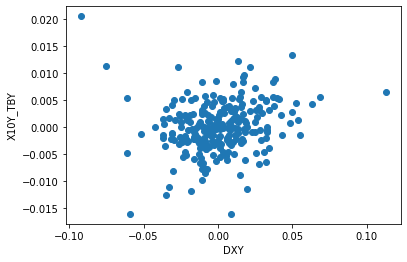

In [4]:
# Scatter plot
fig, ax = plt.subplots()
ax.scatter(data_set["X10Y_TBY"], data_set["DXY"])
ax.set(xlabel="DXY", ylabel="X10Y_TBY")

In [5]:
# OLS regression, predictor: X10Y_TBY, dependent: DXY
model_1 = smf.ols("DXY ~ X10Y_TBY", data_set).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DXY   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     7.738
Date:                Thu, 16 Nov 2023   Prob (F-statistic):            0.00582
Time:                        09:51:47   Log-Likelihood:                 986.78
No. Observations:                 250   AIC:                            -1970.
Df Residuals:                     248   BIC:                            -1963.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0001      0.000      0.474      0.636      -0.000       0.001
X10Y_TBY       0.0336      0.012      2.782      0.006       0.010       0.057
==============================================================================
Omnibus:                       26.741   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.918
Skew:                           0.322   Prob(JB):                     2.45e-21
Kurtosis:                       5.949   Cond. No.                         40.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# Parameters with high precision
print(model_1.summary2().tables[1])
print(type(model_1.summary2().tables[1]))

              Coef.  Std.Err.         t     P>|t|    [0.025    0.975]
Intercept  0.000141  0.000297  0.474101  0.635845 -0.000444  0.000725
X10Y_TBY   0.033568  0.012067  2.781725  0.005823  0.009800  0.057336
<class 'pandas.core.frame.DataFrame'>


0   -0.000214
1    0.000186
2   -0.000919
3   -0.000229
4   -0.000218
dtype: float64


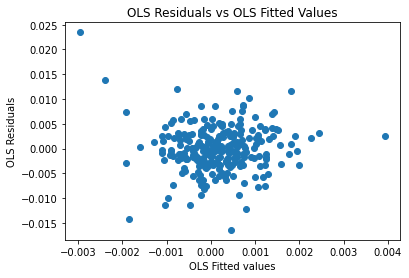

In [7]:
# Scatter Plot for OLS Fitted Values and OLS Residuals

# Fitted values and residuals
model_fitted_y = model_1.fittedvalues  # these are  y^  values
model_resid_y = model_1.resid  # these are  r = y-y^  values

print(model_fitted_y[:5])
# Plot
plt.scatter(x=model_fitted_y, y=model_resid_y)
plt.title("OLS Residuals vs OLS Fitted Values")
plt.xlabel("OLS Fitted values")
plt.ylabel("OLS Residuals")
plt.show()

This shows that there is <u> more variation in residuals when fitted values are negative than when fitted values are positive </u>, especially when fitted values are below -0.002. The scatter plot indicates there might be a heteroskedasticity issue. Let's run a Breusch-Pagan test to double-check the hypothesis.

In [8]:
# Breusch-Pagan Test
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model_1.resid, model_1.model.exog)
pd.DataFrame(test, index=name, columns=[""])

,
Lagrange multiplier statistic,13.897238
p-value,0.000193
f-value,14.597521
f p-value,0.000168


The test result from Figure 6 also confirms the existence of heteroskedasticity because the <u> $p$-value is less than 0.05. </u> Based on the above information, we will run the model with weighted least square, with the weight generated from the formula from the last section.

In [9]:
# Weighted least squares

# Calculate and store in a dataframe absolute residuals and fitted values
data_set["abs_residuals"] = np.abs(model_1.resid)
data_set["fitted_values"] = model_1.fittedvalues
data_set

,Date,DXY,METALS,OIL,US_STK,INTL_STK,X13W_TB,X10Y_TBY,EURUSD,YEAR,abs_residuals,fitted_values
0,1/4/2016,0.002433,0.024283,-0.007559,-0.013980,-0.019802,0.047297,-0.010577,-0.007316,2016,0.002648,-0.000214
1,1/5/2016,0.005361,-0.004741,-0.021491,0.001691,-0.001263,0.322581,0.001336,-0.002436,2016,0.005175,0.000186
2,1/6/2016,-0.002213,0.013642,-0.055602,-0.012614,-0.015171,0.000000,-0.031584,-0.006978,2016,0.001294,-0.000919
3,1/7/2016,-0.009679,0.035249,-0.020606,-0.023992,-0.019255,-0.073171,-0.011024,0.002512,2016,0.009450,-0.000229
4,1/8/2016,0.003258,-0.028064,-0.003306,-0.010977,-0.010471,0.000000,-0.010683,0.013636,2016,0.003476,-0.000218
...,...,...,...,...,...,...,...,...,...,...,...,...
245,12/23/2016,-0.000776,0.016432,0.001322,0.001464,0.000818,0.014199,-0.003917,0.000866,2016,0.000785,0.000009
246,12/27/2016,0.000097,0.023845,0.016598,0.002481,0.000409,-0.010000,0.007865,0.001851,2016,0.000308,0.000405
247,12/28/2016,0.002330,0.017105,0.002968,-0.008265,-0.001226,0.000000,-0.022240,0.000513,2016,0.002936,-0.000606
248,12/29/2016,-0.005617,0.061320,-0.005364,-0.000223,0.005728,-0.111111,-0.011572,-0.004334,2016,0.005369,-0.000248


In [10]:
# Conduct an OLS regression using fitted values (y_i^) as predictor variables, and absolute value of residuals (|r_i|) as dependent variables
model_2 = smf.ols("abs_residuals ~ fitted_values", data_set).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          abs_residuals   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     5.072
Date:                Thu, 16 Nov 2023   Prob (F-statistic):             0.0252
Time:                        09:51:48   Log-Likelihood:                 1085.6
No. Observations:                 250   AIC:                            -2167.
Df Residuals:                     248   BIC:                            -2160.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0035      0.000     17.254      0.000       0.003       0.004
fitted_values    -0.5452      0.242     -2.252      0.025      -1.022      -0.068
==============================================================================
Omnibus:                      112.532   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              460.177
Skew:                           1.869   Prob(JB):                    1.19e-100
Kurtosis:                       8.496   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$ |\hat{r_i}| = |y - \hat{y_i}| = 0.0035 - 0.5452 \hat{y_i} $

$ \hat{Var(e_i)} = |\hat{r_i}|^2 = (|y - \hat{y_i}| = 0.0035 - 0.5452 \hat{y_i} )^2 $

$ \large w_i = \Large\frac{1}{\hat{Var(e_i)}} $

* $|r|$ : residual
* $\hat{y}$ : fitted (predicted) value of $y$
* $e_i$ : error term for observation $i$
* $w_i$ : weight for $r_i^2$

In [11]:
# Calculate weights using our estimate of error variance which is r_i^ squared.
weights = (model_2.fittedvalues) ** -2  # model_2.fittedvalues here is Var(e_i)^ ,  just like the above equation.
data_set["weights"] = weights

# Fit WLS model
Y = data_set["DXY"].tolist()
X = data_set["X10Y_TBY"].tolist()
X = sm.add_constant(X)  # add a intercept point

model_WLS = sm.WLS(Y, X, data_set["weights"]).fit()
model_WLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.100
Model:                            WLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     27.59
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           3.23e-07
Time:                        09:51:48   Log-Likelihood:                 994.52
No. Observations:                 250   AIC:                            -1985.
Df Residuals:                     248   BIC:                            -1978.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.346      0.730      -0.000       0.001
x1             0.0516      0.010      5.253      0.000       0.032       0.071
==============================================================================
Omnibus:                       10.978   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               23.475
Skew:                           0.063   Prob(JB):                     7.99e-06
Kurtosis:                       4.496   Cond. No.                         35.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see *X10Y_TBY* still has a positive coefficient and the coefficient is still significant. The $R^2$ also improves a lot from 0.03 to 0.10. Now, let's look at the residuals and fitted values from WLS to see if we can correct the heteroskedasticity issue.

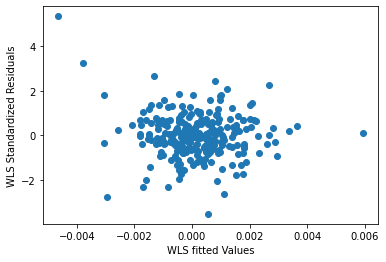

In [12]:
# WLS fitted values and standardized residuals
fitted_valuesWLS = model_WLS.fittedvalues
model_residWLS = model_WLS.resid
std_model_residWLS = model_residWLS / model_residWLS.std(ddof=1)

# Plot WLS fitted v. vs standardized res. scatterplot
plt.scatter(fitted_valuesWLS, std_model_residWLS)
plt.xlabel("WLS fitted Values")
plt.ylabel("WLS Standardized Residuals")
plt.show()

## **4. Derivation of Coefficients for Weighted Least Square Regression**

We first use a single regression model to derive coefficients for weighted least square regression.

Assume we have the following simple regression model for n observations:

$$ 
Y_{i} = \beta_{0} + \beta_{1} X_{i} + e_{i}, \quad  i = 1, …, n  
$$

Where $ e \sim N( 0, \frac{\sigma ^{2}}{w_{i}} ) $ and $w_1,…,w_n $ are known positive numbers

For weighted least square regression, we are looking for $\beta_{0}$ and $\beta_{1}$ that will minimize the sum of weighted squared residuals. Here is the objective function:

$$ 
RSS (\beta_{0}, \beta_{1})= \sum_{i=1}^{n}w_{i} ( Y_{i} - \beta_{0} - \beta_{1} X_{i} )^{2} 
$$

We take partial derivatives of the objective function with respect to $\beta_{0}$ and $\beta_{1}$ to get the WLS estimates of $\hat{\beta_{0}}$ and $\hat{\beta_{1}}$

$$ 
\begin{align*}
  \hat{\beta_{0}}  &= \overline{Y_{w}} - \hat{\beta_{1}} \overline{X_{w}} \\
  \hat{\beta_{1}}  &= \frac{\sum_{i=1}^{n}  w_{i}  (X_{i} - \overline{X_{w}}) (Y_{i} -\overline{Y_{w}})}{\sum_{i=1}^{n}  w_{i}  (X_{i} - \overline{X_{w}})^{2}} 
\end{align*} 
$$

Where $\overline{X_{w}}$ and $\overline{Y_{w}}$ are weighted averages of $X$ and $Y$ with weights $w$.

$$ 
\overline{X_{w}} = \frac{\sum_{i=1}^{n} X_{i} w_{i}}{\sum_{i=1}^{n} w_{i}}  \quad \text{  and  } \quad  \overline{Y_{w}} = \frac{\sum_{i=1}^{n} Y_{i} w_{i}}{\sum_{i=1}^{n} w_{i}} 
$$

We can apply the same process above to solve for coefficients for weighted least square regression with multiple independent variables. This is a general form of derivation because we don't restrict the number of independent variables. Since we have multiple independent variables now, we will use the matrix form to solve the minimization problem.

For multiple weighted least regression, we have the model:

$$ 
\mathbf{Y} = \mathbf{X} \boldsymbol{\beta } + \mathbf{e} 
$$

$$ 
\mathrm{Var}(e) = \sigma^{2} \mathbf{W}^{-1} 
$$

We minimize the following sum of weighted squared residuals in matrix form for multiple weighted least square regression models. Here is the objective function:

$$ 
RSS(\boldsymbol{\beta }) = \sum_{i=1}^{n} w_{i} (Y_{i} - X_{i}^{T} \boldsymbol{\beta})^{2} = (\mathbf{Y} - \mathbf{X} \boldsymbol{\beta})^{T} \mathbf{W} (\mathbf{Y} - \mathbf{X} \boldsymbol{\beta}) 
$$

We take the partial derivatives of the above objective function with respect to $\boldsymbol{\beta}$ and set the equations to $0$ to solve for $\boldsymbol{\beta}$.

$$ 
\sum_{i=1}^{n} w_{i} e_{i} X_{i}^{t}= 0 
$$

The general form of WLS estimator is given by

$$ 
\hat{\boldsymbol{\beta}} = (\mathbf{X}^{T} \mathbf{W} \mathbf{X})^{-1}  (\mathbf{X}^{T} \mathbf{W \textbf{Y}}) 
$$

<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

\begin{align*} Y_{i}&=\textbf{x}_{i}^{\textrm{T}}\beta+\epsilon_{i} \\ \Rightarrow\epsilon_{i}(\beta)&=Y_{i}-\textbf{x}_{i}^{\textrm{T}}\beta, \end{align*}